In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Reading datasets

In [2]:
data = pd.read_csv('train.csv')
testdata = pd.read_csv('test.csv')

# Viewing the datasets

In [3]:
data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
testdata.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


In [5]:
data.describe()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,...,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,814.500000,35.645577,0.482187,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,...,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,470.107435,9.481794,0.499836,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,...,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,407.750000,29.000000,0.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,...,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,814.500000,34.000000,0.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,...,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,1221.250000,42.000000,1.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,...,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,1628.000000,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,...,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


In [6]:
testdata.describe()

,Id,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,...,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.0
mean,235.500000,37.010638,9.293617,2.914894,1033.929787,2.708511,2.736170,2.693617,6584.874468,2.670213,...,3.155319,0.800000,11.387234,2.710638,7.070213,4.238298,2.263830,4.261702,3.051064,1.0
std,135.821574,9.166425,8.084506,1.016491,593.994868,1.089850,0.729057,1.138473,4758.485182,2.516421,...,0.362595,0.855435,7.817961,1.261744,5.900505,3.462042,3.272058,3.501693,1.413289,0.0
min,1.000000,18.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1091.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,118.250000,31.000000,2.000000,2.000000,491.500000,2.000000,2.000000,2.000000,2964.750000,1.000000,...,3.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000,1.0
50%,235.500000,35.000000,7.000000,3.000000,1042.000000,3.000000,3.000000,3.000000,5038.000000,1.000000,...,3.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000,1.0
75%,352.750000,43.000000,15.000000,4.000000,1537.750000,4.000000,3.000000,4.000000,8362.250000,4.000000,...,3.000000,1.000000,15.000000,3.000000,10.000000,7.000000,3.000000,7.000000,4.000000,1.0
max,470.000000,60.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,4.000000,19943.000000,9.000000,...,4.000000,3.000000,40.000000,6.000000,40.000000,17.000000,15.000000,17.000000,5.000000,1.0


In [7]:
data.shape

(1628, 29)

In [8]:
print(data['Attrition'].value_counts())
data['Behaviour'].value_counts()

0    843
1    785
Name: Attrition, dtype: int64


1    1628
Name: Behaviour, dtype: int64

"Behaviour" seems to be a redundant feature.

In [9]:
Y = data["Attrition"]

In [10]:
data.shape

(1628, 29)

In [11]:
testdata.shape

(470, 28)

DROPPING IRRELEVANT COLUMNS

In [12]:
data = data.drop(['Id','Attrition','EmployeeNumber','Behaviour'],axis=1)
testdata = testdata.drop(['Id','EmployeeNumber','Behaviour'],axis=1)


Changing CATEGORICAL DATA to NUMERICAL DATA

In [13]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

data['BusinessTravel'] = labelencoder.fit_transform(data['BusinessTravel'])
data['Department'] = labelencoder.fit_transform(data['Department'])
data['EducationField'] = labelencoder.fit_transform(data['EducationField'])
data['Gender'] = labelencoder.fit_transform(data['Gender'])
data['JobRole'] = labelencoder.fit_transform(data['JobRole'])
data['MaritalStatus'] = labelencoder.fit_transform(data['MaritalStatus'])
data['OverTime'] = labelencoder.fit_transform(data['OverTime'])

testdata['BusinessTravel'] = labelencoder.fit_transform(testdata['BusinessTravel'])
testdata['Department'] = labelencoder.fit_transform(testdata['Department'])
testdata['EducationField'] = labelencoder.fit_transform(testdata['EducationField'])
testdata['Gender'] = labelencoder.fit_transform(testdata['Gender'])
testdata['JobRole'] = labelencoder.fit_transform(testdata['JobRole'])
testdata['MaritalStatus'] = labelencoder.fit_transform(testdata['MaritalStatus'])
testdata['OverTime'] = labelencoder.fit_transform(testdata['OverTime'])

# Visualization of data and EDA

Data visualization gives us a clear idea of what the information means by giving it visual context through maps or graphs. This makes the data more natural for the human mind to comprehend and therefore makes it easier to identify trends, patterns, and outliers within large data sets

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F7FE0D310>,
      dtype=object)

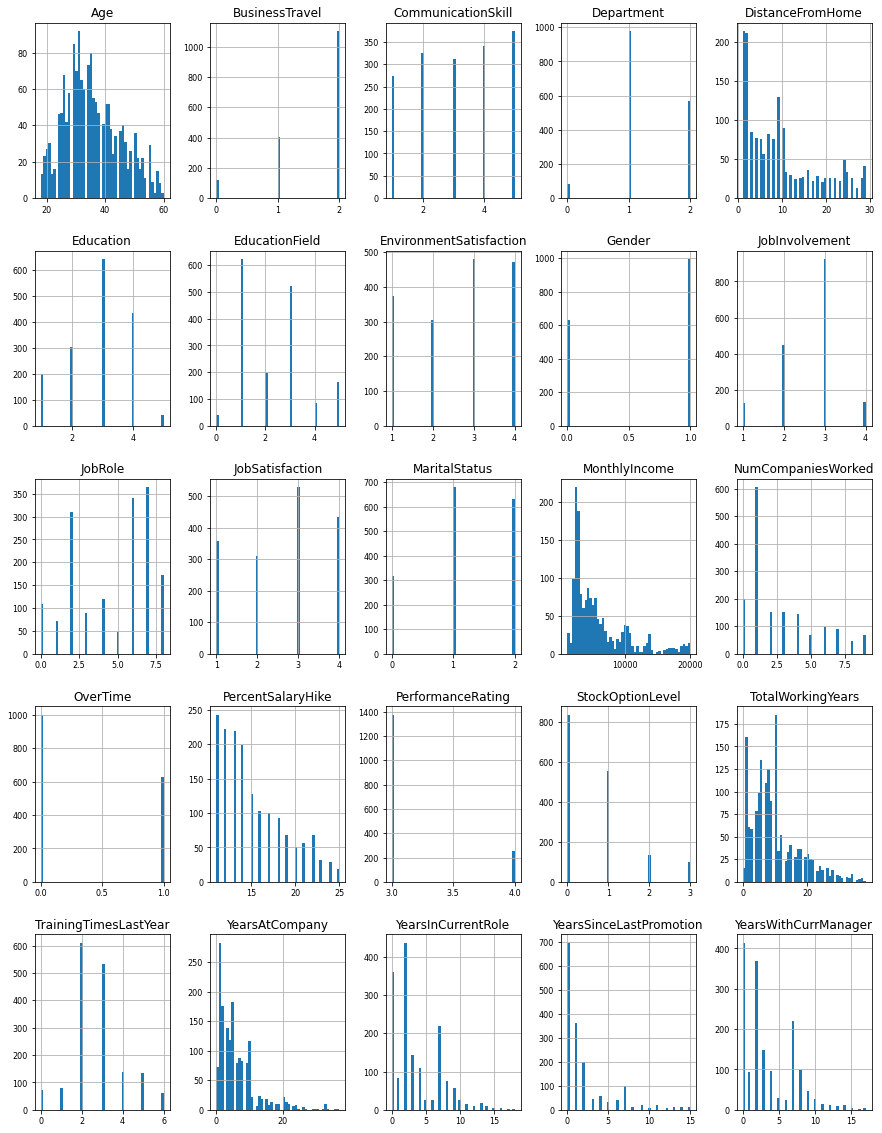

In [14]:
data.hist(figsize=(15, 20), bins=50, xlabelsize=8, ylabelsize=8)

Plotting a heatmap to find relationship between different features

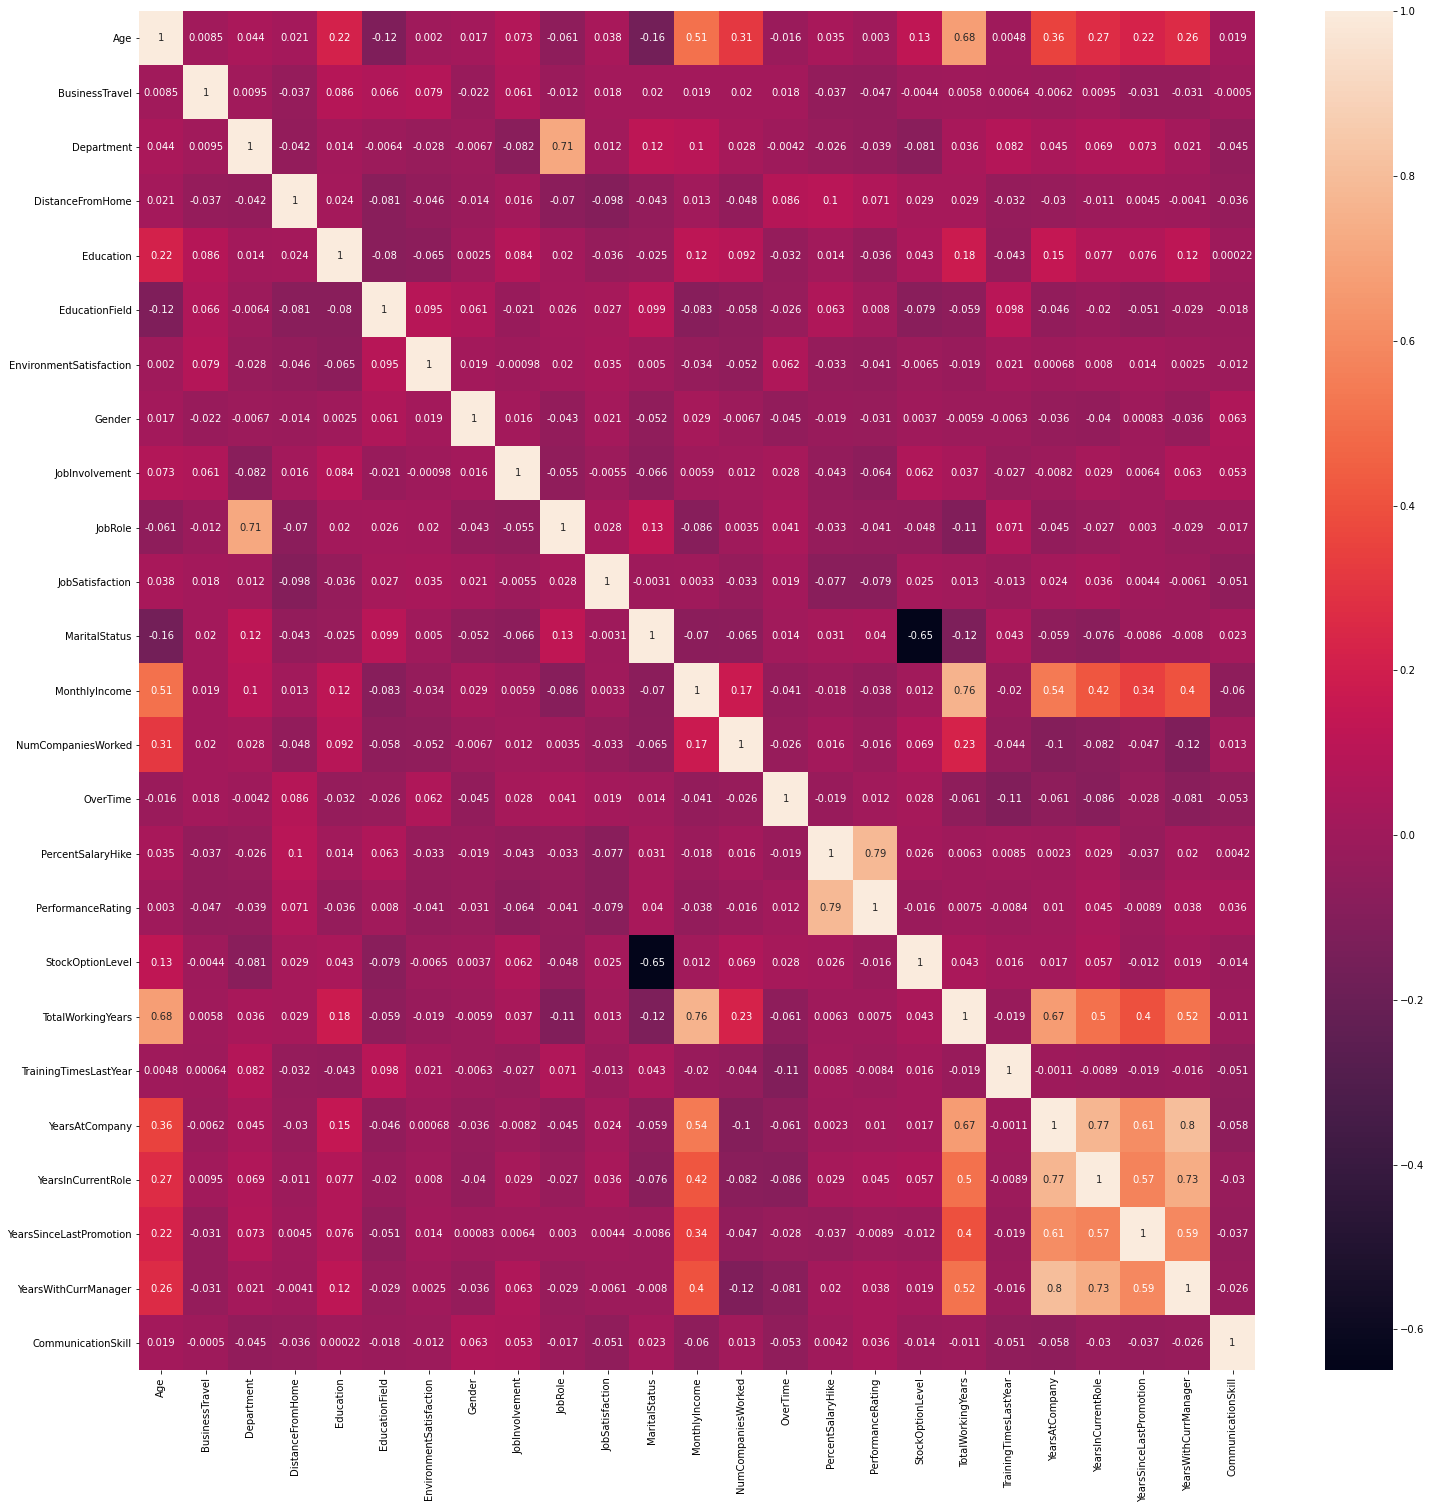

In [15]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True)

# Splitting data

In [16]:
x_train,x_test,y_train,y_test = train_test_split(data,Y,test_size=0.3,random_state=4)

In [17]:
x_train.shape

(1139, 25)

In [18]:
x_test.shape

(489, 25)

# Fitting the model

We shall try Logistic Regression, Decision Tree Classifer, Random Forest Classifier & Gradient Boosting Classifier and see what works best for us here.

In [19]:
from sklearn.metrics import accuracy_score


LOGISTIC REGRESSION

In [20]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000, C=0.5, penalty='l2', random_state=1)
LR.fit(data,Y)
y_pred = LR.predict(x_test)
y_predd = LR.predict(data)
print(roc_auc_score(y_test,y_pred))
print(roc_auc_score(Y,y_predd))

0.7568658720832633
0.7541423940884466


DECISION TREE CLASSIFIER

In [21]:
DTC = DecisionTreeClassifier(max_depth=3,min_samples_leaf=3)
DTC.fit(data,Y)
y_pred1 = DTC.predict(x_test)
y_predd1 = DTC.predict(data)
print(roc_auc_score(y_test,y_pred1))
print(roc_auc_score(Y,y_predd1))

0.748136645962733
0.7498885539210132


RANDOM FOREST CLASSIFIER

In [22]:
RF = RandomForestClassifier(bootstrap=True,max_depth=80,max_features=3,min_samples_leaf=5,min_samples_split=12,n_estimators=100)
RF.fit(data,Y)
y_pred2 = RF.predict(x_test)
y_predd2 = RF.predict(data)
print(roc_auc_score(y_test,y_pred2))
print(roc_auc_score(Y,y_predd2))

0.9903474903474904
0.9869513641755634


In [23]:
GB = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=42)
GB.fit(data,Y)
y_pred3 = GB.predict(x_test)
y_predd3 = GB.predict(data)
print(roc_auc_score(y_test,y_pred3))
print(roc_auc_score(Y,y_predd3))

0.9295114990767164
0.9084026565722965


We see that Random Forest Classifier gives the best results.

# Creating Output

In [25]:
y_prob = RF.predict_proba(testdata)
y_prob = list(y_prob[:,1])
Id = np.arange(1,len(y_prob)+1)
Id = list(Id)

In [26]:
ans = pd.DataFrame(list(zip(Id,y_prob)),columns=['Id','Attrition'])
ans


,Id,Attrition
0,1,0.190977
1,2,0.162586
2,3,0.259455
3,4,0.241547
4,5,0.108270
...,...,...
465,466,0.570187
466,467,0.922111
467,468,0.429228
468,469,0.259236


In [27]:
ans.to_csv('answer.csv',index=False)

In [28]:
import os
print(os.getcwd())

C:\Users\hp
